<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [263]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### Load Data From CSV File


In [264]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [266]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [267]:
df.isna().any()

Unnamed: 0        False
Unnamed: 0.1      False
loan_status       False
Principal         False
terms             False
effective_date    False
due_date          False
age               False
education         False
Gender            False
dtype: bool

### Convert to date time object

In [268]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


# Data visualization and pre-processing

Let’s see how many of each class is in our data set


In [270]:
df['loan_status'].value_counts()


PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


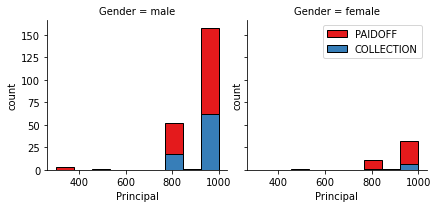

In [271]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
g.set(ylabel='count')
plt.show()

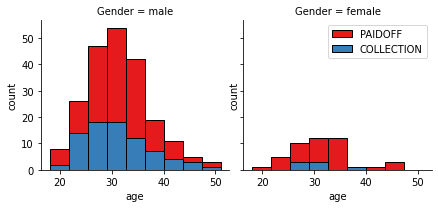

In [272]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
g.set(ylabel='count')
plt.show()

# Pre-processing:  Feature selection/extraction

### Let's look at the day of the week people get the loan


### Feature selection/extraction

In [273]:
df['dayofweek'] = df['effective_date'].apply(lambda x: x.strftime("%A")[:3])
df['dayofweek'].value_counts()

Sun    166
Mon     87
Wed     31
Sat     31
Tue     20
Fri      8
Thu      3
Name: dayofweek, dtype: int64

In [274]:
df['dayofweek'] = df['effective_date'].dt.dayofweek


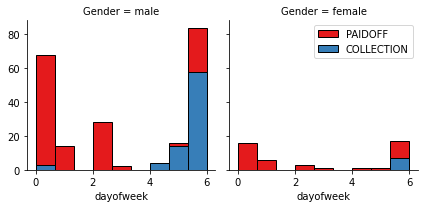

In [275]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [276]:
# Feature binarization to set a threshold value less than day 4

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

In [277]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


In [278]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

##### 86 % of female pay there loans while only 73 % of males pay there loan


In [279]:
# convert male to 0 and female to 1

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding


In [280]:
# How about education?

df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [281]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [282]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis=1, inplace=True)

In [283]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


In [284]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [285]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [286]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.

In [287]:
from sklearn.preprocessing import StandardScaler

X_Standardized = StandardScaler().fit(X).transform(X)
X_Standardized[0:5]
X_train, X_test, y_train, y_test = train_test_split(X_Standardized, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


## K Nearest Neighbor(KNN)


In [288]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

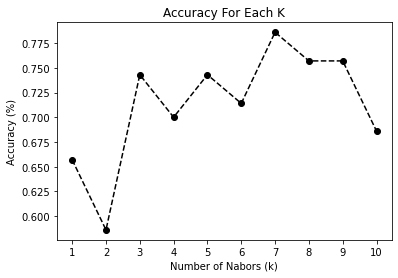


best_k:7  accuracy:0.786



In [289]:
k5 = 10
acc = []
test_k = range(1 ,k5 + 1)
for k in test_k:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    a = metrics.accuracy_score(y_test, y_pred)
    acc.append(round(a, 3))
    
highest_acc = max(acc)
best_k = acc.index(max(acc))+1
    
plt.plot(test_k,acc,linestyle='--', marker='o', color='k')
plt.title('Accuracy For Each K')
plt.xticks(test_k)
plt.xlabel('Number of Nabors (k)')
plt.ylabel('Accuracy (%)')
plt.show()
print(f'\nbest_k:{best_k}  accuracy:{highest_acc}\n')

In [290]:
knn = KNeighborsClassifier(n_neighbors=7).fit(X_Standardized, y)
yhat_knn=knn.predict(X_test)
yhat_knn[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Decision Tree


In [291]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

In [292]:
D_tree = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12]    
}

search = GridSearchCV(D_tree, params, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
final_model = search.best_estimator_
print(f"Best Parameters:{final_model}")

Best Parameters:DecisionTreeClassifier(max_depth=2)


In [293]:
D_tree = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train, y_train)

y_pred = D_tree.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {round(acc,3)}')

Accuracy = 0.786


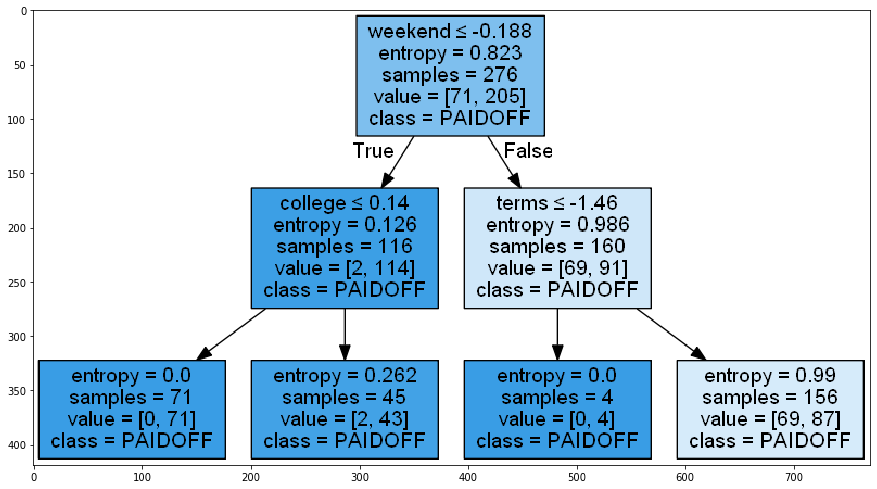

In [294]:
from six import StringIO 
import pydotplus
from sklearn import tree
import matplotlib.image as mpimg

#Visualize the Descision Tree Model
dot_data = StringIO()
filename = "Loantree.png"
featureNames = Feature.columns
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(D_tree,feature_names=featureNames, out_file=dot_data, 
                         class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15,30))
plt.imshow(img,interpolation='nearest')

## Support Vector Machine


In [295]:
from sklearn.svm import SVC 

svm = SVC()

params = {
    'C':[1,10,100,1000],
    'gamma':[0.001,0.0001],
    'kernel':['rbf']
}

search = GridSearchCV(svm, params, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
final_model = search.best_estimator_
print(f"Best Parameters: {final_model}")

Best Parameters: SVC(C=1, gamma=0.001)


In [296]:
svm = SVC(C=1, gamma=0.001).fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy: {round(acc,3)}")

Accuracy: 0.786


In [297]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[ 0 15]
 [ 0 55]]


C:\Users\GAMER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GAMER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GAMER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


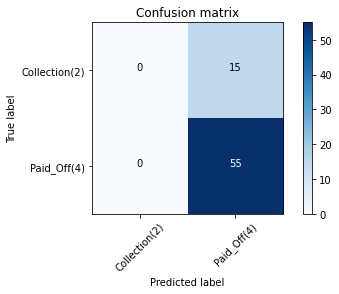

In [298]:
from sklearn.metrics import classification_report, confusion_matrix


cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection(2)','Paid_Off(4)'],normalize= False,  title='Confusion matrix')

## Logistic Regression



In [299]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X_train, y_train)
y_pred = logr.predict(X_test)
acc = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy: {round(acc,3)}")

Accuracy: 0.729


# Model Evaluation using Test set

In [326]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [327]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [328]:
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

test_df['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,0,3,0
2,21,21,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,1,3,0
3,24,24,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,0,4,1
4,35,35,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,0,4,1


In [329]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test, pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis=1, inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [330]:
Feature_test.shape

(54, 8)

In [331]:
y_test = test_df['loan_status'].values
y_test[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [332]:
X_test.shape, y_test.shape

((54, 8), (54,))

In [333]:
X_test = StandardScaler().fit(Feature_test).transform(Feature_test)
X_test[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -4.12,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51, -4.12, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98, -4.12, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.24, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.24,  2.4 , -0.8 , -0.86]])

In [334]:
# KNN Evalution

yhat_knn_test=knn.predict(X_test)
yhat_knn_test[0:5]


f1_knn = f1_score(y_test, yhat_knn_test, average  ='weighted')
jaccard_knn = jaccard_score(y_test, yhat_knn_test, pos_label='PAIDOFF')

print("For KNN - Test set Accuracy - F1-Score: ", f1_knn)
print("For KNN - Test set Accuracy - Jaccard score: ", jaccard_knn)

For KNN - Test set Accuracy - F1-Score:  0.6328400281888654
For KNN - Test set Accuracy - Jaccard score:  0.6538461538461539


In [335]:
# Decision Tree Evalution

yhat_tree_test=D_tree.predict(X_test)
yhat_tree_test[0:5]

f1_dt = f1_score(y_test, yhat_tree_test, average='weighted')
jaccard_dt = jaccard_score(y_test, yhat_tree_test, pos_label='PAIDOFF')

print("For Decision Tree - Test set Accuracy - F1-Score: ", f1_dt)
print("For Decision Tree - Test set Accuracy - Jaccard score: ", jaccard_dt)

For Decision Tree - Test set Accuracy - F1-Score:  0.6304176516942475
For Decision Tree - Test set Accuracy - Jaccard score:  0.7407407407407407


In [336]:
# SVM Evalution

yhat_svm_test=svm.predict(X_test)
yhat_svm_test[0:5]

f1_svm = f1_score(y_test, yhat_svm_test, average  = 'weighted')
jaccard_svm = jaccard_score(y_test, yhat_svm_test, pos_label='PAIDOFF')

print("For SVM - Test set Accuracy - F1-Score: ", f1_svm)
print("For SVM - Test set Accuracy - Jaccard score: ", jaccard_svm)

For SVM - Test set Accuracy - F1-Score:  0.6304176516942475
For SVM - Test set Accuracy - Jaccard score:  0.7407407407407407


In [337]:
# Logistic Regression Evalution

yhat_lr_test=logr.predict(X_test)
yhat_lr_test[0:5]
yhat_lr_test_prob = logr.predict_proba(X_test)
yhat_lr_test_prob[0:5]

f1_lr = f1_score(y_test, yhat_lr_test, average  ='weighted')
jaccard_lr = jaccard_score(y_test, yhat_lr_test, pos_label='PAIDOFF')
logloss_lr = log_loss(y_test, yhat_lr_test_prob)

print("For LogisticRegression - Test set Accuracy - F1-Score: ", f1_lr)
print("For LogisticRegression - Test set Accuracy - Jaccard score: ", jaccard_lr)
print("For LogisticRegression - Test set Accuracy - LogLoss score: ",  logloss_lr)


For LogisticRegression - Test set Accuracy - F1-Score:  0.6304176516942475
For LogisticRegression - Test set Accuracy - Jaccard score:  0.7407407407407407
For LogisticRegression - Test set Accuracy - LogLoss score:  0.5482476600775888


In [345]:
report = {   "Algorithm":['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
             
             "Jaccard":  [jaccard_knn, jaccard_dt, jaccard_svm, jaccard_lr], 
             
             "F1-score": [f1_knn, f1_dt, f1_svm, f1_lr],
             
             "LogLoss": ['NA', 'NA', 'NA', logloss_lr] 
             
             }


report_df = pd.DataFrame(report, columns=["Jaccard", "F1-score", "LogLoss"], index=["KNN", "Decision Tree", "SVM", "Logistic Regression"])
report_df.columns.name = "Algorithm"

report_df.head()

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.653846,0.632840,NA
Decision Tree,0.740741,0.630418,NA
SVM,0.740741,0.630418,NA
Logistic Regression,0.740741,0.630418,0.548248


### Function to Get Results


In [342]:
def get_results(models):
    rows = []
    for model in models:
        dec = 3
        y_pred = model.predict(X_test)
        modelName = str(model)
        modelName = modelName[:modelName.find('(')]

        jacc = round(jaccard_score(y_test, y_pred, average='weighted'), dec)
        f1 = round(f1_score(y_test, y_pred, average='weighted'), dec)
        acc = round(metrics.accuracy_score(y_test, y_pred), dec)

        if model == logr:
            y_pred_prob = np.array([[round(item[0],4),round(item[1],3)]for item in logr.predict_proba(X_test)])
            log = round(log_loss(y_test,y_pred_prob),dec)
        else:
            log = 'NA'
        rows.append([modelName,jacc,f1,acc,log])

    results = pd.DataFrame(data=rows, columns=['Algorithm','Jaccard','F1-Score','Accuracy','LogLoss'])
    return results

In [343]:
models = [knn,D_tree,svm,logr]
results_df = get_results(models)
print(results_df)

                Algorithm  Jaccard  F1-Score  Accuracy LogLoss
0    KNeighborsClassifier    0.510     0.633     0.667      NA
1  DecisionTreeClassifier    0.549     0.630     0.741      NA
2                     SVC    0.549     0.630     0.741      NA
3      LogisticRegression    0.549     0.630     0.741   0.548


In [346]:
results_df = pd.melt(results_df, id_vars="Algorithm", var_name="Eval_Metric", value_name="Value")
results_df = results_df.drop(results_df[results_df['Eval_Metric'] == 'LogLoos'].index)
results_df

,Algorithm,Eval_Metric,Value
0,KNeighborsClassifier,Jaccard,0.51
1,DecisionTreeClassifier,Jaccard,0.549
2,SVC,Jaccard,0.549
3,LogisticRegression,Jaccard,0.549
4,KNeighborsClassifier,F1-Score,0.633
5,DecisionTreeClassifier,F1-Score,0.63
6,SVC,F1-Score,0.63
7,LogisticRegression,F1-Score,0.63
8,KNeighborsClassifier,Accuracy,0.667
9,DecisionTreeClassifier,Accuracy,0.741


### The highest accuracy of 74% is achieved by decision tree, support vector machine, logistic regression, It's hard to say how the accuracy of these models could be improved, but some options like collecting more data about customers or feature engineering. It may be helpful to have more information about the client's location, income, marital status, and number of children.